In [3]:
import json
from pathlib import Path
import random

import matplotlib
import matplotlib.pyplot as plt

import os

import torch

from data import CLEVRTextSplit, CLEVRMultimodalSplit, Scene

In [4]:
from config import load_config
    
config = load_config()
# config.shuffle_object_identities = True
config.display_object_properties = False

In [12]:
config.base_path = '/workspace1/fidelrio/CLEVR_CoGenT_v1.0/colored/216b'
config.vocabulary_path = f'{config.base_path}/vocab.txt'
config.rels_to_sample = 0
config.max_scene_size = 60
config.mlm_probability = 0.15
config.not_only_front_right_relations = True
config.multimodal_pretraining = True
config.batch_size = 256
config.n_tokens = 96
config.token_translation_path = 'data/color_translation_random_216b_to_8.json'

In [13]:
# config_to_copy = {
#     'base_path': '/workspace1/fidelrio/CLEVR_CoGenT_v1.0',
#     'batch_size': 64,
#     'd_hidden': 256,
#     'display_object_properties': False,
#     'filter_symmetric_relations': True,
#     'lr': 0.01,
#     'max_epochs': 200,
#     'max_question_size': 45,
#     'max_scene_size': 659,
#     'n_head': 4,
#     'n_layers': 4,
#     'n_outputs': 28,
#     'n_patches': 100,
#     'n_tokens': 117,
#     'only_front_right_relations': True,
#     'pad_idx': 1,
#     'patch_height': 32,
#     'patch_width': 48,
#     'rels_to_sample': 50,
#     'resume_training': False,
#     'use_txt_scene': True,
#  }

# for k, v in vars(config).items():
#     if k in config_to_copy and config_to_copy[k] != v:
#         print(k, v, config_to_copy[k])

In [14]:
config.vocabulary_path

'/workspace1/fidelrio/CLEVR_CoGenT_v1.0/colored/216b/vocab.txt'

In [15]:
# train_dataset, test_dataset, systematic_dataset = CLEVRTextSplit.build_splits(
train_dataset, test_dataset, systematic_dataset = CLEVRMultimodalSplit.build_splits(
    config
)

In [18]:
len(train_dataset.processor.vocabulary)

96

In [8]:
idx = 30
# question = train_dataset.questions[idx]
# image_idx = question['image_index']
# scene = train_dataset.indexed_scenes[image_idx]

# question_str = question['question']
# answer_str = question['answer']

image, scene = train_dataset.retrieve_raw(idx)

In [9]:
config.rels_to_sample = 0
config.only_front_right_relations = False
config.filter_symmetric_relations = True
config.display_object_properties = False

s = Scene.from_dict(scene,
                    shuffle_relations=True,
                    relations_to_sample=config.rels_to_sample,
                    only_front_right=config.only_front_right_relations,
                    filter_symmetric=config.filter_symmetric_relations,
                    always_display_properties=config.display_object_properties)

In [10]:
config.rels_to_sample, config.only_front_right_relations, config.filter_symmetric_relations, config.display_object_properties

(0, False, True, False)

In [11]:
len(s.relations), list(enumerate(s.relations))

(0, [])

In [12]:
s.objects

[[O0]: large red metal cylinder,
 [O1]: small yellow rubber cube,
 [O2]: large green metal cylinder,
 [O3]: small yellow rubber sphere,
 [O4]: large yellow metal sphere,
 [O5]: small purple rubber cylinder,
 [O6]: large blue rubber cube]

In [13]:
str(s)

'[O0] large red metal cylinder [SEP] [O1] small yellow rubber cube [SEP] [O2] large green metal cylinder [SEP] [O3] small yellow rubber sphere [SEP] [O4] large yellow metal sphere [SEP] [O5] small purple rubber cylinder [SEP] [O6] large blue rubber cube'

In [14]:
from tqdm.auto import tqdm

In [15]:
relations_to_sample = 0
only_front_right_relations = False
filter_symmetric_relations = True
display_object_properties = False

n_rels = []
n_tokens = []
for idx in tqdm(range(len(train_dataset))):
#     question = train_dataset.questions[idx]

#     image_idx = question['image_index']
#     scene = train_dataset.indexed_scenes[image_idx]

#     question_str = question['question']
#     answer_str = question['answer']
    
    image, scene = train_dataset.retrieve_raw(idx)

    s = Scene.from_dict(scene,
                        shuffle_relations=True,
                        relations_to_sample=relations_to_sample,
                        only_front_right=only_front_right_relations,
                        filter_symmetric=filter_symmetric_relations,
                        always_display_properties=display_object_properties)

    n_rels.append(len(s.relations))
    n_tokens.append(len(str(s).split()))

  0%|          | 0/70000 [00:00<?, ?it/s]

In [16]:
print(min(n_rels), max(n_rels))
print(min(n_tokens), max(n_tokens))

0 0
17 59


[]

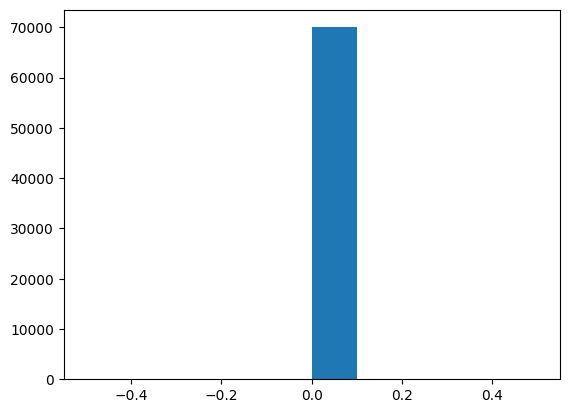

In [17]:
plt.hist(n_rels, bins=10)
plt.plot()

[]

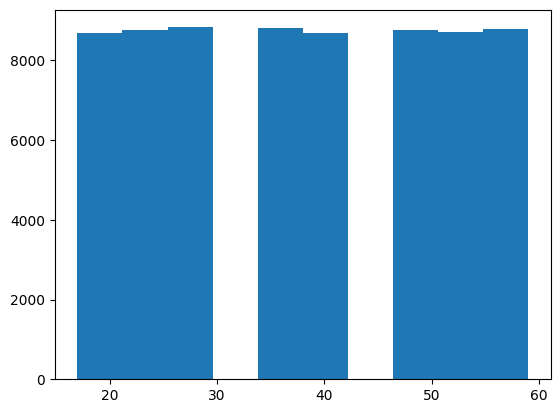

In [18]:
plt.hist(n_tokens, bins=10)
plt.plot()

In [19]:
max(n_tokens)

59

In [ ]:
only_front_right_relations = False
filter_symmetric_relations = True
display_object_properties = False

n_rels = []
n_tokens = []
for idx in range(len(train_dataset)):
    question = train_dataset.questions[idx]

    image_idx = question['image_index']
    scene = train_dataset.indexed_scenes[image_idx]

    question_str = question['question']
    answer_str = question['answer']
    
    s = Scene.from_dict(scene,
                        shuffle_relations=True,
                        relations_to_sample=50,
                        only_front_right=only_front_right_relations,
                        filter_symmetric=filter_symmetric_relations,
                        always_display_properties=display_object_properties)
    
    n_rels.append(len(s.relations))
    n_tokens.append(len(str(s).split()))
    

In [ ]:
print(min(n_rels), max(n_rels))
print(min(n_tokens), max(n_tokens))

In [ ]:
plt.hist(n_rels, bins=10)
plt.plot()

In [ ]:
plt.hist(n_tokens, bins=10)
plt.plot()

In [ ]:
only_front_right_relations = False
filter_symmetric_relations = True
display_object_properties = True

n_rels = []
n_tokens = []
for idx in range(len(train_dataset)):
    question = train_dataset.questions[idx]

    image_idx = question['image_index']
    scene = train_dataset.indexed_scenes[image_idx]

    question_str = question['question']
    answer_str = question['answer']

    s = Scene.from_dict(scene,
                        shuffle_relations=True,
                        relations_to_sample=50,
                        only_front_right=only_front_right_relations,
                        filter_symmetric=filter_symmetric_relations,
                        always_display_properties=display_object_properties)
    
    n_rels.append(len(s.relations))
    n_tokens.append(len(str(s).split()))
    

In [ ]:
print(min(n_rels), max(n_rels))
print(min(n_tokens), max(n_tokens))

In [ ]:
plt.hist(n_rels, bins=10)
plt.plot()

In [ ]:
plt.hist(n_tokens, bins=10)
plt.plot()

In [ ]:
dataset_path = Path('/mnt/ialabnas/datasets/CLEVR_CoGenT_v1.0')
scenes_path = dataset_path / 'scenes/CLEVR_trainA_scenes.json'
with scenes_path.open('r') as fp:
    scenes = json.load(fp)
    
questions_path = dataset_path / 'questions/CLEVR_trainA_questions.json'
with questions_path.open('r') as fp:
    questions = json.load(fp)

In [ ]:
questions['questions'][3]

In [ ]:
def n_relations(scene):
    relations = ['behind', 'front']#, 'left', 'right']
    count = 0
    relationships = scene['relationships']
    for r in relations:
        count += sum(map(len, relationships[r]))
    return count

n_relations(scenes['scenes'][0])

In [ ]:
(scenes['scenes'][0])

In [ ]:
n_relations_per_example = list(map(n_relations, scenes['scenes']))
plt.hist(n_relations_per_example)
plt.plot()

In [ ]:
def n_objects(scene):
    return len(scene['objects'])

In [ ]:
n_objects_per_example = list(map(n_objects, scenes['scenes']))
plt.hist(n_objects_per_example, bins=max(n_objects_per_example)-3)
plt.plot()

In [ ]:
def object_to_text(obj, obj_idx):
    properties = ['size', 'color', 'material', 'shape']
    obj_str = [f'[O{obj_idx}]'] + [obj[prop] for prop in properties]
    return ' '.join(obj_str)

def relations_to_text(relations):
#     relation_types = ['behind', 'front', 'left', 'right']
    relation_types = ['front', 'right'] # symetric relations

    relations_str = []
    for relation_type in relation_types:
        relation = relations[relation_type]
        for obj, subjs in enumerate(relation):
            relation_str = [f'[O{obj}] {relation_type} [O{subj}]' for subj in subjs]
            relations_str.extend(relation_str)
    
    return relations_str

def scene_to_txt(scene, rels_to_sample=None, shuffle=True):
    objs_strs = []
    for obj_idx, obj in enumerate(scene['objects']):
        objs_strs.append(object_to_text(obj, obj_idx=obj_idx))
    
    relations_strs = relations_to_text(scene['relationships'])
    if rels_to_sample and rels_to_sample < len(relations_strs):
        relations_strs = random.sample(relations_strs, k)
    if shuffle:
        random.shuffle(relations_strs)

    return ' [SEP] '.join(objs_strs + relations_strs)

In [ ]:
from PIL import Image
ip = '/mnt/ialabnas/datasets/CLEVR_CoGenT_v1.0/images/trainA/' + questions['questions'][8888]['image_filename']
Image.open(ip)

In [ ]:
object_to_text(scenes['scenes'][8888]['objects'][0], obj_idx=0)

In [ ]:
object_to_text(scenes['scenes'][8888]['objects'][1], obj_idx=1)

In [ ]:
relations_to_text(scenes['scenes'][8888]['relationships'])

In [ ]:
scene_to_txt(scenes['scenes'][8888])

In [ ]:
# scene_to_txt(scenes['scenes'][8888], rels_to_sample=5)

In [ ]:
to_str = lambda s: str(Scene.from_dict(s, 
                                        relations_to_sample=config.rels_to_sample,
                                        only_front_right=config.only_front_right_relations,
                                        filter_symmetric=config.filter_symmetric_relations,
                                        always_display_properties=config.display_object_properties))

str_len_per_example = list(map(len, map(str.split, map(to_str, scenes['scenes']))))
plt.hist(str_len_per_example)
plt.plot()

In [ ]:
str_fnc = lambda s: str(Scene.from_dict(s, relations_to_sample=50,
                                        only_front_right=config.only_front_right_relations,
                                        filter_symmetric=config.filter_symmetric_relations,
                                        always_display_properties=config.display_object_properties))

str_len_per_example = list(map(len, map(str.split, map(str_fnc, scenes['scenes']))))
plt.hist(str_len_per_example)
plt.plot()

In [ ]:
vocabulary = set()
for scene in scenes['scenes']:
    scene_text = scene_to_txt(scene)
    vocabulary.update(scene_text.split())

vocabulary = ['[CLS]', '[PAD]'] + list(sorted(vocabulary))

In [ ]:
len(vocabulary), vocabulary